In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
import os
from matplotlib import font_manager as fm, rcParams
import matplotlib.patches as mpatches
import uncertainties as unc
import uncertainties.unumpy as unp

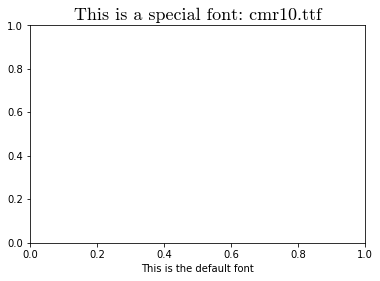

In [6]:
font_sz = 18

fig, ax = plt.subplots()

fpath = os.path.join(rcParams["datapath"], "fonts/ttf/cmr10.ttf")
prop = fm.FontProperties(fname=fpath,size=font_sz)
fname = os.path.split(fpath)[1]
ax.set_title('This is a special font: {}'.format(fname), fontproperties=prop)
ax.set_xlabel('This is the default font')

plt.show()

(25,) (25,)


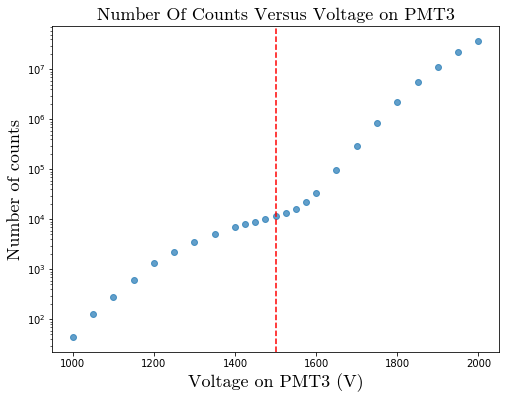

In [32]:
# HV threshold
_xx = np.array([1000,1050,1100,1150,1200,1250,1300,1350,1400,1425,1450,1475,1500,1525,1550,1575,1600,1650,1700,1750,1800,1850,1900,1950,2000])
_yy = np.array([44,129,282,616,1356,2216,3583,5073,7022,7993,8970,10097,11453,13328,16316,22094,33817,97121,299314,855003,2207700,5610700,11329600,22526200,37533500])
print(_xx.shape,_yy.shape)
plt.title("Number Of Counts Versus Voltage on PMT3",fontproperties=prop)
plt.xlabel("Voltage on PMT3 (V)",fontproperties=prop)
plt.ylabel('Number of counts',fontproperties=prop)
plt.scatter(_xx,_yy,alpha=0.7)
plt.axvline(x=1500, color='r', linestyle='--')
plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig('hv.png')
plt.show()

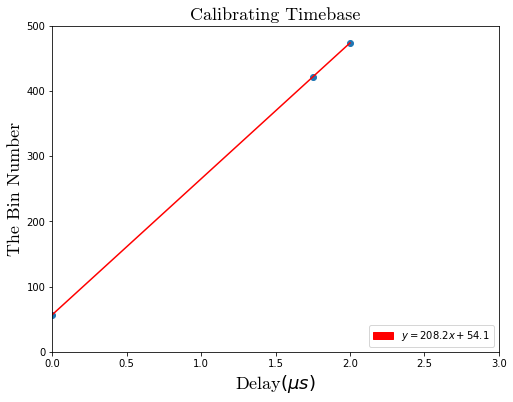

[208.21052632  57.07017544]
Distance(micro second) between each bin for histogram is 0.004802831142548645


In [33]:
# Calibrating timebase
_x = np.array([0,1.75,2])
_y = np.array([57,422,473])

def TAC(x,k,b):
    # Assume the TAC has linear mapping from time to amplitude
    return k*x+b

_popt, _pcov = curve_fit(TAC,_x,_y)

plt.title("Calibrating Timebase",fontproperties=prop)
plt.ylabel("The Bin Number",fontproperties=prop)
plt.xlabel(r'Delay$(\mu s)$',fontproperties=prop)
plt.xlim([0,3])
plt.ylim([0,500])
plt.plot(_x,TAC(_x,*_popt),'r-')
plt.scatter(_x,_y)
cal = mpatches.Patch(color='red',label=r'$y=208.2x + 54.1$')
plt.legend(loc="lower right",handles=[cal])
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("cal.png")
plt.show()
print(_popt)
dt = 1/_popt[0]

print("Distance(micro second) between each bin for histogram is {}".format(dt))

Total events: 80684.0


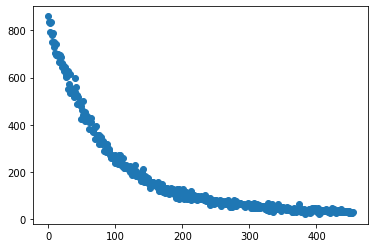

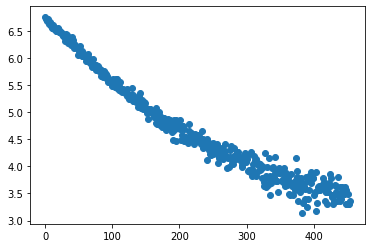

In [34]:
data = np.loadtxt("data/muon.txt")

# No useless bins
y = data[56:510]

print("Total events:",y.sum())
# xs just used for plotting
x = np.linspace(0,y.shape[0],y.shape[0])

plt.scatter(x,y)
plt.show()

plt.scatter(x,np.log(y))
plt.show()

In [54]:
def N(x,a,b,c):
    # Fitting the exponetial decay for muon
    return a * np.exp(-b*x) + c

def M(x,a,b):
    # Fitting the exponetial decay for muon
    return a * np.exp(-b*x)

[797.89622385   2.15788836]
[798.41197396   2.58093795  35.47852292]


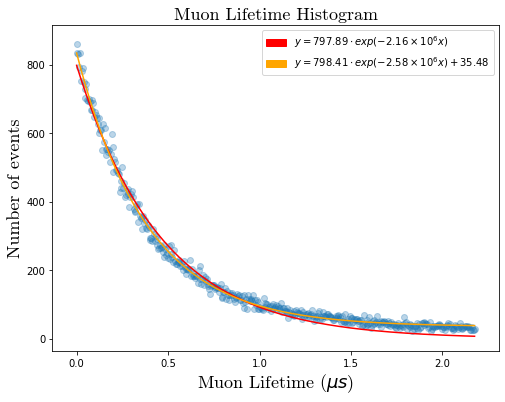

In [73]:
x = np.arange(0,10,dt)
xs = x[:y.shape[0]]
popt, pcov = curve_fit(M,xs,y)
print(popt)
poptt, pcovv = curve_fit(N,xs,y)
print(poptt)
plt.plot(xs,M(xs,*popt),'r-',label="fit1")
plt.plot(xs,N(xs,*poptt),'orange',label="fit2")
plt.scatter(xs,y,alpha=0.3)
plt.title("Muon Lifetime Histogram",fontproperties=prop)
plt.xlabel(r'Muon Lifetime ($\mu s$)',fontproperties=prop)
plt.ylabel("Number of events",fontproperties=prop)
cal = mpatches.Patch(color='red',label=r'$y=797.89 \cdot exp(-2.16\times 10^6 x)$')
call = mpatches.Patch(color='orange',label=r'$y=798.41 \cdot exp(-2.58\times 10^6 x) + 35.48$')
plt.legend(loc="upper right",handles=[cal,call])
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("hist.png")
plt.show()

[797.89622385   2.15788836]
[798.41197396   2.58093795  35.47852292]
798.4+/-2.9 2.581+/-0.019 35.5+/-1.1


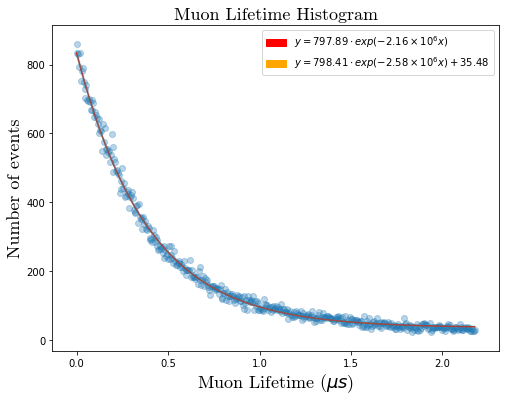

In [82]:
x = np.arange(0,10,dt)
xs = x[:y.shape[0]]
popt, pcov = curve_fit(M,xs,y)
print(popt)
poptt, pcovv = curve_fit(N,xs,y)
print(poptt)
a, b, c = unc.correlated_values(poptt, pcovv)
print(a,b,c)
py = a * unp.exp(-b * xs) + c
nom = unp.nominal_values(py)
std = unp.std_devs(py)
plt.plot(xs, nom, 'red')
plt.plot(xs, nom - 2* std, c='c',alpha=0.3)
plt.plot(xs, nom + 2* std, c='c',alpha=0.3)
#plt.plot(xs,M(xs,*popt),'r-',label="fit1")
#plt.plot(xs,N(xs,*poptt),'orange',label="fit2")
plt.scatter(xs,y,alpha=0.3)
plt.title("Muon Lifetime Histogram",fontproperties=prop)
plt.xlabel(r'Muon Lifetime ($\mu s$)',fontproperties=prop)
plt.ylabel("Number of events",fontproperties=prop)
cal = mpatches.Patch(color='red',label=r'$y=797.89 \cdot exp(-2.16\times 10^6 x)$')
call = mpatches.Patch(color='orange',label=r'$y=798.41 \cdot exp(-2.58\times 10^6 x) + 35.48$')
plt.legend(loc="upper right",handles=[cal,call])
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig("hist.png")
plt.show()

x is the time (histogram x axis) startring from 0 with a increment dt.

The first ten elements: [0.00000000e+00 4.80283114e-09 9.60566229e-09 1.44084934e-08
 1.92113246e-08 2.40141557e-08 2.88169869e-08 3.36198180e-08
 3.84226491e-08 4.32254803e-08]
[7.98411958e+02 2.58093772e+06 3.54785134e+01]
The mean lifetime is 3.874560758635986e-07 sec


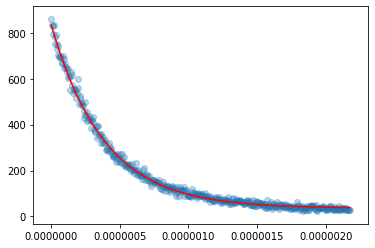

[2.88909907e+00 1.88427058e+04 1.08567216e+00]
0.9624937943218689


In [86]:
x = np.arange(0,10,dt)*1E-6
print('''x is the time (histogram x axis) startring from 0 with a increment dt.\n
The first ten elements:''',x[:10])

# Make xs and y the same shape to fit
xs = x[:y.shape[0]]

popt, pcov = curve_fit(N,xs,y)
print(popt)
print("The mean lifetime is {} sec".format(1/popt[1]))

plt.plot(xs,N(xs,*popt),'r-',label="fit")
plt.scatter(xs,y,alpha=0.3)
plt.show()

p_sigma = np.sqrt(np.diag(pcov))
print(p_sigma)

s_sq = (np.sum((N(xs,*popt)-y)**2))/(y.sum()-2)
print(s_sq)

x is the time (histogram x axis) startring from 0 with a increment dt.

The first ten elements: [0.00000000e+00 4.80283114e-09 9.60566229e-09 1.44084934e-08
 1.92113246e-08 2.40141557e-08 2.88169869e-08 3.36198180e-08
 3.84226491e-08 4.32254803e-08]
[7.97893955e+02 2.15787595e+06]
The mean lifetime is 4.6341866836347946e-07 sec


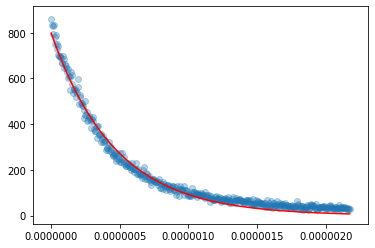

[4.58095333e+00 1.76506086e+04]
2.886700082528713


In [87]:
x = np.arange(0,10,dt)*1E-6
print('''x is the time (histogram x axis) startring from 0 with a increment dt.\n
The first ten elements:''',x[:10])

# Make xs and y the same shape to fit
xs = x[:y.shape[0]]

popt, pcov = curve_fit(M,xs,y)
print(popt)
print("The mean lifetime is {} sec".format(1/popt[1]))

plt.plot(xs,M(xs,*popt),'r-',label="fit")
plt.scatter(xs,y,alpha=0.3)
plt.show()
p_sigma = np.sqrt(np.diag(pcov))
print(p_sigma)
s_sq = (np.sum((M(xs,*popt)-y)**2))/(y.sum()-2)
print(s_sq)